<a href="https://colab.research.google.com/github/jcarey-shu/dissertation/blob/main/suppobox_3_wo_whois_gscv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load 3 👇 : suppobox_3 SHU. GridSearchCV. Train & Test

### Load 3 = 1000 legit domains; ~1000 suppobox_3 word-based DGAs; my top 10 correlated features; no WHOIS history. GridSearchCV. Train & test.

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

def load_data1():
  return pd.read_csv(Path("/content/gdrive/MyDrive/Colab/Data/loads/raw_data/suppobox_3.1000+whois-history.csv"))

df1 = load_data1()

def load_data2():
  return pd.read_csv(Path("/content/gdrive/MyDrive/Colab/Data/loads/raw_data/tranco.1000+whois-history.csv"))

df2 = load_data2()

data_load = [df1, df2]
df = pd.concat(data_load).reset_index(drop=True)

Mounted at /content/gdrive


In [ ]:
display(df)

,domain,nlp_1g_25p,nlp_1g_50p,nlp_1g_75p,nlp_1g_cov,nlp_1g_dist,nlp_1g_dst_ca,nlp_1g_dst_ch,nlp_1g_dst_em,nlp_1g_dst_eu,...,nlp_r_num_odn,nlp_r_sym_2dn,nlp_r_sym_fqdn,nlp_r_sym_odn,nlp_r_vow_2dn,nlp_r_vow_fqdn,nlp_r_vow_odn,whois_rec,whois_change,class
0,constancesheridan.net,0.0,0.0,0.050000,0.001534,11.0,33.440508,0.162816,9.771134,0.361222,...,0.0,0.0,0.047619,0.0,0.352941,0.333333,0.000000,0,NaN,1
1,clevelandcristians.net,0.0,0.0,0.047619,0.001431,11.0,32.816488,0.141997,9.133038,0.355627,...,0.0,0.0,0.045455,0.0,0.333333,0.318182,0.000000,0,NaN,1
2,sebastianmargaret.net,0.0,0.0,0.050000,0.001599,10.0,33.246792,0.197077,9.321134,0.385316,...,0.0,0.0,0.047619,0.0,0.411765,0.380952,0.000000,0,NaN,1
3,christinethompsett.net,0.0,0.0,0.047619,0.001592,11.0,32.279252,0.162242,6.294270,0.351701,...,0.0,0.0,0.045455,0.0,0.277778,0.272727,0.000000,0,NaN,1
4,christinagrenville.net,0.0,0.0,0.047619,0.001412,12.0,32.523238,0.141997,8.466372,0.358581,...,0.0,0.0,0.045455,0.0,0.333333,0.318182,0.000000,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,zillow.com,0.0,0.0,0.000000,0.001735,7.0,34.243527,0.208646,6.477723,0.387101,...,0.0,0.0,0.100000,0.0,0.333333,0.300000,0.000000,22,0.0,0
1994,zippyshare.com,0.0,0.0,0.076923,0.001253,12.0,33.245335,0.135381,7.077009,0.339747,...,0.0,0.0,0.071429,0.0,0.300000,0.285714,0.000000,19,0.0,0
1995,zoho.com,0.0,0.0,0.000000,0.002039,5.0,35.120871,0.304246,7.732746,0.461642,...,0.0,0.0,0.125000,0.0,0.500000,0.375000,0.000000,35,0.0,0
1996,zol.com.cn,0.0,0.0,0.000000,0.001817,6.0,34.230153,0.248091,8.643460,0.409966,...,0.0,0.0,0.200000,0.0,0.333333,0.200000,0.333333,13,1.0,0


In [ ]:
#df.drop("domain", axis=1, inplace=True)
# JC SHU Feature Selection
df.drop(df.columns.difference(['nlp_l_2dn','nlp_3g_dist','nlp_l_fqdn','nlp_1g_e','nlp_2g_dist', \
                               'nlp_2g_ken','nlp_2g_spe','nlp_3g_ken','nlp_3g_spe','nlp_3g_sumsq','class']), axis=1, inplace=True)
# UMU Feature Selection
#df.drop(df.columns.difference(['nlp_l_2dn','nlp_r_con_2dn','nlp_r_let_fqdn','nlp_1g_norm', \
#                               'nlp_1g_tpstd','nlp_2g_dst_em','nlp_2g_tpstd','nlp_3g_dst_em', \
#                               'nlp_3g_dst_eu','nlp_3g_norm','class']), axis=1, inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

nlp_1g_e        0
nlp_2g_dist     0
nlp_2g_ken      0
nlp_2g_spe      0
nlp_3g_dist     0
nlp_3g_ken      0
nlp_3g_spe      0
nlp_3g_sumsq    0
nlp_l_2dn       0
nlp_l_fqdn      0
class           0
dtype: int64

In [ ]:
df.dropna(how="any", inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1997
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nlp_1g_e      1998 non-null   float64
 1   nlp_2g_dist   1998 non-null   float64
 2   nlp_2g_ken    1998 non-null   float64
 3   nlp_2g_spe    1998 non-null   float64
 4   nlp_3g_dist   1998 non-null   float64
 5   nlp_3g_ken    1998 non-null   float64
 6   nlp_3g_spe    1998 non-null   float64
 7   nlp_3g_sumsq  1998 non-null   float64
 8   nlp_l_2dn     1998 non-null   float64
 9   nlp_l_fqdn    1998 non-null   float64
 10  class         1998 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 187.3 KB


In [ ]:
X, y = df.iloc[:, :-1], df.iloc[:, -1] # the last column is the target

In [ ]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

# Generate train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)



In [ ]:
IMAGES_PATH = Path() / "gdrive" / "MyDrive" / "Colab" / "Data" / "images" / "suppobox_3"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=600):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
df.describe()

,nlp_1g_e,nlp_2g_dist,nlp_2g_ken,nlp_2g_spe,nlp_3g_dist,nlp_3g_ken,nlp_3g_spe,nlp_3g_sumsq,nlp_l_2dn,nlp_l_fqdn,class
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,3.812239,13.716717,0.157157,0.180497,13.399399,0.046159,0.047683,13.679680,12.389389,16.535035,0.500501
std,1.761763,5.510661,0.034379,0.039461,5.989361,0.011596,0.011979,6.253331,6.175900,6.022701,0.500125
min,0.482578,2.000000,0.061742,0.070932,1.000000,0.013004,0.013433,1.000000,1.000000,4.000000,0.000000
25%,2.073128,9.000000,0.130620,0.150061,8.000000,0.036778,0.037991,8.000000,6.000000,11.000000,0.000000
50%,4.481792,16.000000,0.173686,0.199537,17.000000,0.053607,0.055376,18.000000,17.000000,21.000000,1.000000
75%,5.444739,19.000000,0.189048,0.217186,19.000000,0.056671,0.058541,19.000000,18.000000,22.000000,1.000000
max,6.770896,23.000000,0.207672,0.238581,22.000000,0.060979,0.062992,31.000000,21.000000,25.000000,1.000000


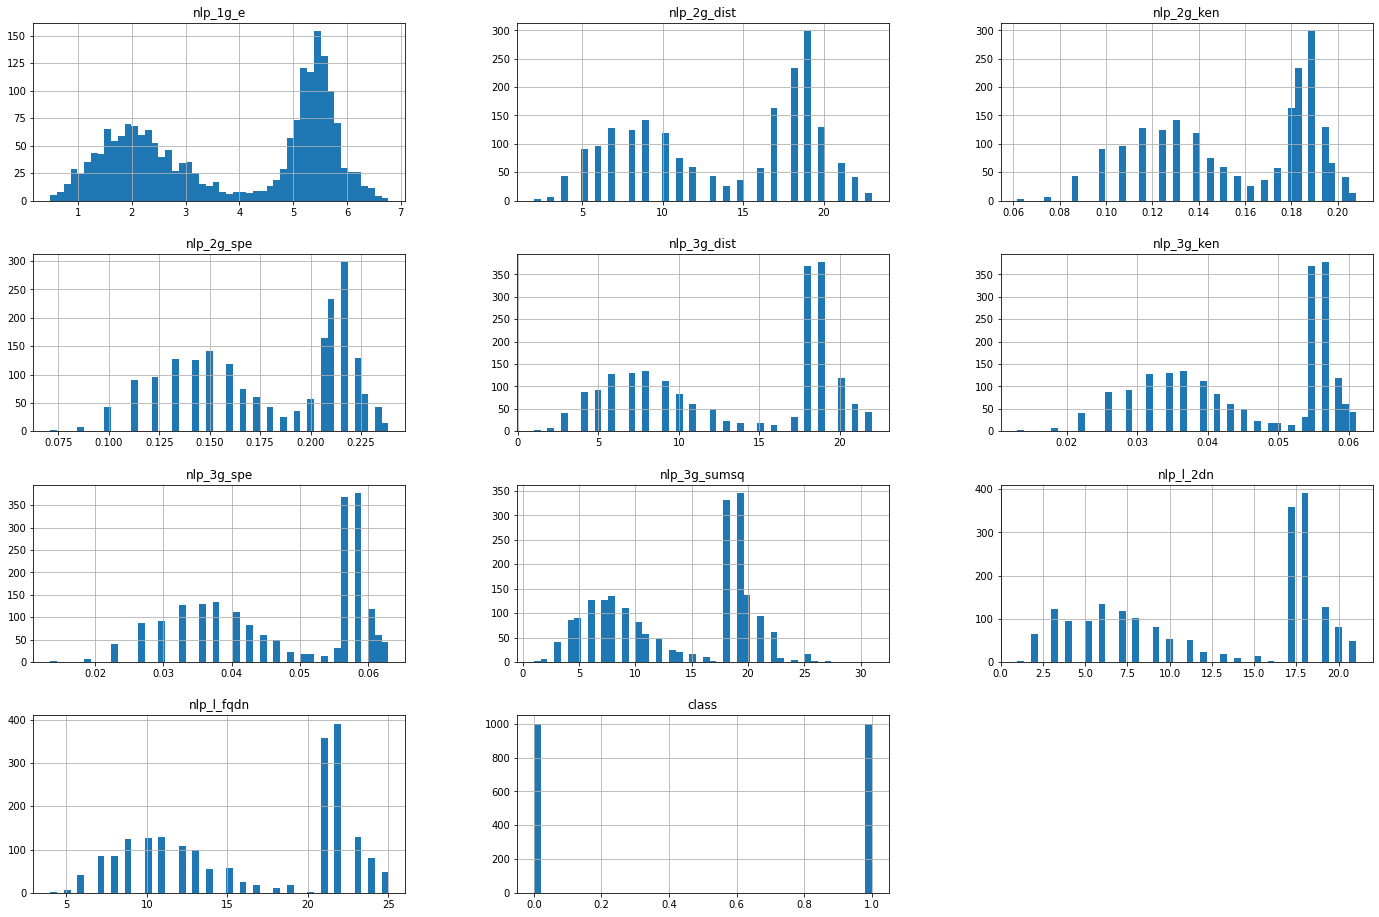

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(24, 16))
plt.show()

### Naive Bayes (NB) classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)


MultinomialNB()

In [ ]:
print(f"Naive Bayes scored {mnb_clf.score(X_test, y_test).round(5)} on test")
print(f"Naive Bayes scored {mnb_clf.score(X_train, y_train).round(5)} on train")

Naive Bayes scored 0.94667 on test
Naive Bayes scored 0.93634 on train


#### Confusion Matrix for mnb_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(mnb_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred).round(5)
cm

array([[609,  94],
       [  0, 695]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.88086

In [ ]:
recall_score(y_train, y_train_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.93666

<function matplotlib.pyplot.show(*args, **kw)>

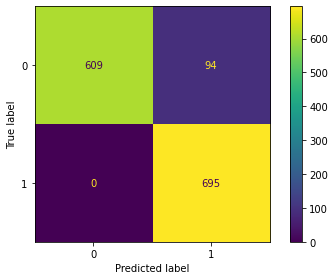

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_3_wo_mnb_train_cm")
plt.show

#### Confusion Matrix for mnb_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(mnb_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred).round(5)
cm

array([[254,  41],
       [  0, 305]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.8815

In [ ]:
recall_score(y_test, y_test_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.93702

<function matplotlib.pyplot.show(*args, **kw)>

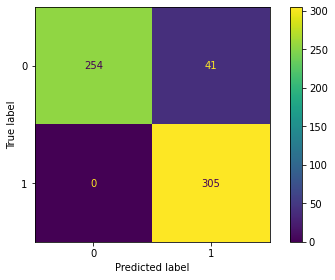

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_3_wo_mnb_test_cm")
plt.show

### Logistic Regression (LG) classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(max_iter=1000)
lg_clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
print(f"Logistic Regression scored {lg_clf.score(X_test, y_test).round(5)} on test")
print(f"Logistic Regression scored {lg_clf.score(X_train, y_train).round(5)} on train")

Logistic Regression scored 0.99833 on test
Logistic Regression scored 0.99714 on train


#### Confusion Matrix for lg_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(lg_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[698,   5],
       [  0, 695]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.99286

In [ ]:
recall_score(y_train, y_train_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.99642

<function matplotlib.pyplot.show(*args, **kw)>

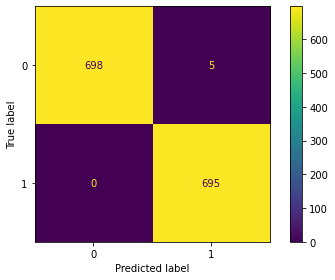

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_3_wo_lg_train_cm")
plt.show

#### Confusion Matrix for lg_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(lg_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[292,   3],
       [  0, 305]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.99026

In [ ]:
recall_score(y_test, y_test_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.99511

<function matplotlib.pyplot.show(*args, **kw)>

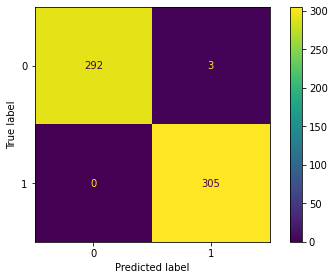

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_3_wo_lg_test_cm")
plt.show

### K-Nearest Neighbours (KNN) classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn_clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='brute', n_jobs=-1)

In [ ]:
print(f"K-Nearest Neighbours scored {knn_clf.score(X_test, y_test).round(5)} on test")
print(f"K-Nearest Neighbours scored {knn_clf.score(X_train, y_train).round(5)} on train")

K-Nearest Neighbours scored 0.99667 on test
K-Nearest Neighbours scored 0.99642 on train


#### Confusion Matrix for knn_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[697,   6],
       [  0, 695]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.99144

In [ ]:
recall_score(y_train, y_train_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.9957

<function matplotlib.pyplot.show(*args, **kw)>

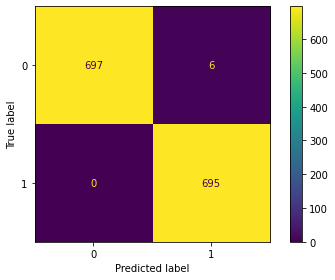

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_3_wo_knn_train_cm")
plt.show

#### Confusion Matrix for knn_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(knn_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[292,   3],
       [  0, 305]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.99026

In [ ]:
recall_score(y_test, y_test_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.99511

<function matplotlib.pyplot.show(*args, **kw)>

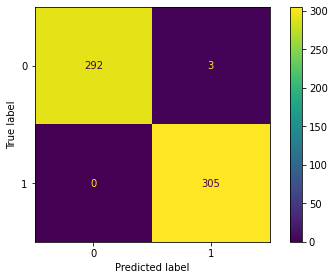

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_3_wo_knn_test_cm")
plt.show

###✋Support Vector Machine (SVM) classifier

In [ ]:
# if we receive ConvergenceWarning then use:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_norm_svm = StandardScaler().fit_transform(X)

# Generate train/test sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_norm_svm, y, test_size=0.3, random_state=42
)

# re-run above LinearSVC


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

svm_clf=LinearSVC(C=0.00001)
svm_clf.fit(X_train_svm, y_train_svm)
svm_clf1 = CalibratedClassifierCV(svm_clf)
svm_clf1.fit(X_train_svm, y_train_svm)


CalibratedClassifierCV(base_estimator=LinearSVC(C=1e-05))

In [ ]:
print(f"SVM scored {svm_clf.score(X_test_svm, y_test_svm).round(5)} on test")
print(f"SVM scored {svm_clf.score(X_train_svm, y_train_svm).round(5)} on train")

SVM scored 0.97 on test
SVM scored 0.97067 on train


#### Confusion Matrix for svm_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_svm_pred = cross_val_predict(svm_clf, X_train_svm, y_train_svm, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_svm, y_train_svm_pred)
cm

array([[662,  41],
       [  0, 695]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_svm, y_train_svm_pred).round(5)

0.94429

In [ ]:
recall_score(y_train_svm, y_train_svm_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_svm, y_train_svm_pred).round(5)

0.97135

<function matplotlib.pyplot.show(*args, **kw)>

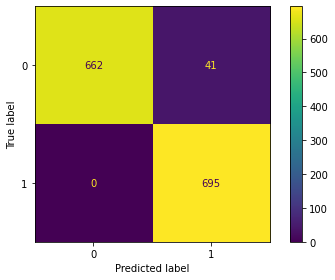

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train_svm, y_train_svm_pred)
save_fig("suppobox_3_wo_svm_train_cm")
plt.show

#### Confusion Matrix for svm_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_svm_pred = cross_val_predict(svm_clf, X_test_svm, y_test_svm, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_svm, y_test_svm_pred)
cm

array([[277,  18],
       [  0, 305]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_svm, y_test_svm_pred).round(5)

0.94427

In [ ]:
recall_score(y_test_svm, y_test_svm_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test_svm, y_test_svm_pred).round(5)

0.97134

<function matplotlib.pyplot.show(*args, **kw)>

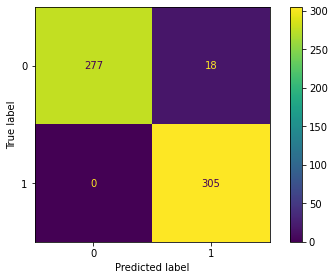

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test_svm, y_test_svm_pred)
save_fig("suppobox_3_wo_svm_test_cm")
plt.show

### ✅Decision Tree (DT) classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint
dt_clf = DecisionTreeClassifier()


In [ ]:
print('Parameters currently in use:\n')
pprint(dt_clf.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


In [ ]:
param_grid = {'max_depth': [1, 2, 3, 4, 5,6,7,8,9,10,15,20,30,40,50],
              'max_features': [1, 2, 3, 4,5,6,7,8,9,10],
              'random_state':[0, 1, 2, 3, 4, 5, 10, 15,20,35,50,80,100,150,180,200],
              'criterion':['gini','entropy'],
              }

In [ ]:
#GSCV_dt_clf = GridSearchCV(dt_clf, param_grid=param_grid, cv=10)
#GSCV_dt_clf.fit(X_train, y_train)

In [ ]:
#GSCV_dt_clf.best_params_

In [ ]:
dt_clf1 = DecisionTreeClassifier(criterion='gini', max_depth=1, max_features=1, random_state=2)

In [ ]:
dt_clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_features=1, random_state=2)

In [ ]:
print(f"Decision Tree scored {dt_clf1.score(X_test, y_test).round(5)} on test")
print(f"Decision Tree scored {dt_clf1.score(X_train, y_train).round(5)} on train")

Decision Tree scored 0.99667 on test
Decision Tree scored 0.99714 on train


#### Confusion Matrix for dt_clf1 train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(dt_clf1, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[699,   4],
       [  0, 695]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.99428

In [ ]:
recall_score(y_train, y_train_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.99713

<function matplotlib.pyplot.show(*args, **kw)>

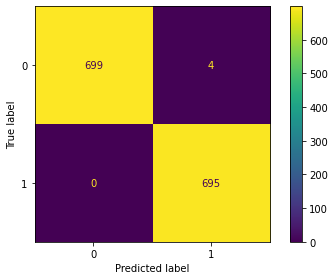

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_3_wo_dt_train_cm")
plt.show

#### Confusion Matrix for dt_clf1 test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(dt_clf1, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[293,   2],
       [  0, 305]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.99349

In [ ]:
recall_score(y_test, y_test_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.99673

<function matplotlib.pyplot.show(*args, **kw)>

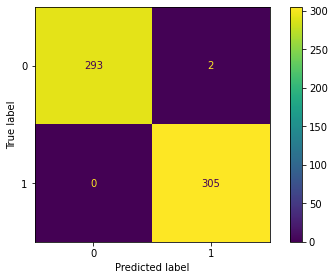

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_3_wo_dt_test_cm")
plt.show

### Bagging Decision Tree (BG) classifier (ensemble)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg_clf=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg_clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5)

In [ ]:
print(f"Bagging Decision Tree scored {bg_clf.score(X_test, y_test).round(5)} on test")
print(f"Bagging Decision Tree scored {bg_clf.score(X_train, y_train).round(5)} on train")

Bagging Decision Tree scored 0.99833 on test
Bagging Decision Tree scored 0.99785 on train


#### Confusion Matrix for bg_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(bg_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[699,   4],
       [  3, 692]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.99425

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.99568

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.99497

<function matplotlib.pyplot.show(*args, **kw)>

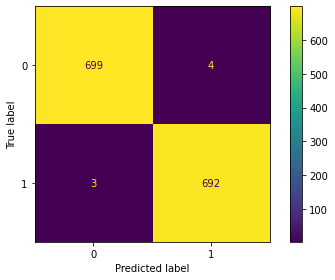

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_3_wo_bg_train_cm")
plt.show

#### Confusion Matrix for bg_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(bg_clf, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[293,   2],
       [  0, 305]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.99349

In [ ]:
recall_score(y_test, y_test_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.99673

<function matplotlib.pyplot.show(*args, **kw)>

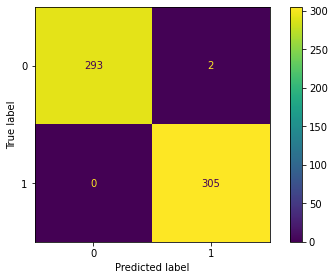

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_3_wo_bg_test_cm")
plt.show

### ✅Boosting Decision Tree (ADB) classifier (ensemble). GridSearchCV

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [ ]:
adb_clf = AdaBoostClassifier(DecisionTreeClassifier())

In [ ]:
print('Parameters currently in use:\n')
pprint(adb_clf.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(),
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


In [ ]:
param_grid = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1]
              }

In [ ]:
#GSCV_adb_clf = GridSearchCV(adb_clf, param_grid=param_grid, scoring='f1', n_jobs=-1)
#GSCV_adb_clf.fit(X_train, y_train)

In [ ]:
#GSCV_adb_clf.best_params_

In [ ]:
adb_clf1 = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=5,max_depth=2),n_estimators=10,learning_rate=0.01)

In [ ]:
adb_clf1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.01, n_estimators=10)

In [ ]:
print(f"AdaBoost Classifier scored {adb_clf1.score(X_test, y_test).round(5)} on test")
print(f"AdaBoost Classifier scored {adb_clf1.score(X_train, y_train).round(5)} on train")

AdaBoost Classifier scored 0.99667 on test
AdaBoost Classifier scored 0.99714 on train


#### Confusion Matrix for adb_clf train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(adb_clf1, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[699,   4],
       [  0, 695]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.99428

In [ ]:
recall_score(y_train, y_train_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.99713

<function matplotlib.pyplot.show(*args, **kw)>

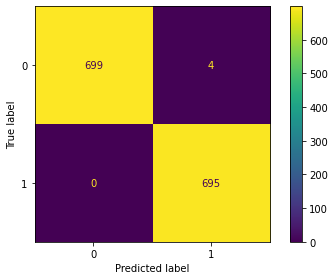

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_3_wo_adb_train_cm")
plt.show

#### Confusion Matrix for adb_clf test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(adb_clf1, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[294,   1],
       [  1, 304]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.99672

In [ ]:
recall_score(y_test, y_test_pred).round(5)

0.99672

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.99672

<function matplotlib.pyplot.show(*args, **kw)>

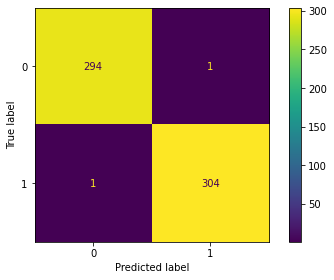

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_3_wo_adb_test_cm")
plt.show

### ✅Random Forest (RF) classifier (ensemble)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
print('Parameters currently in use:\n')
pprint(rf_clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
#GSCV_rf_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5)
#GSCV_rf_clf.fit(X_train, y_train)


In [ ]:
#GSCV_rf_clf.best_params_

In [ ]:
rf_clf1 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=200, \
                                 max_depth=4, criterion='gini')

In [ ]:
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=42)

In [ ]:
print(f"Random Forest scored {rf_clf1.score(X_test, y_test).round(5)} on test")
print(f"Random Forest scored {rf_clf1.score(X_train, y_train).round(5)} on train")

Random Forest scored 0.99667 on test
Random Forest scored 0.99714 on train


#### Confusion Matrix for rf_clf1 train

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rf_clf1, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[699,   4],
       [  3, 692]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_train_pred).round(5)

0.99425

In [ ]:
recall_score(y_train, y_train_pred).round(5)

0.99568

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred).round(5)

0.99497

<function matplotlib.pyplot.show(*args, **kw)>

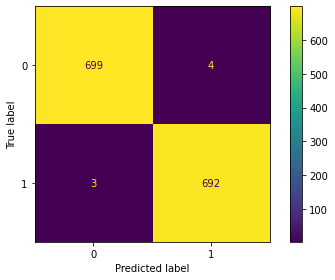

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
save_fig("suppobox_3_wo_rf_train_cm")
plt.show

#### Confusion Matrix for rf_clf1 test

In [ ]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(rf_clf1, X_test, y_test, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[293,   2],
       [  0, 305]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_test_pred).round(5)

0.99349

In [ ]:
recall_score(y_test, y_test_pred).round(5)

1.0

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred).round(5)

0.99673

<function matplotlib.pyplot.show(*args, **kw)>

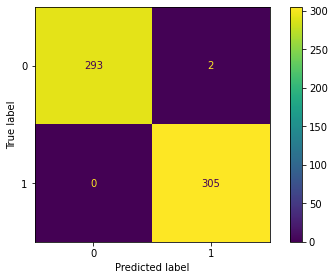

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
save_fig("suppobox_3_wo_rf_test_cm")
plt.show

### 👉Receiver Operating Characteristic (ROC) curve

In [ ]:
rndm_probs = [0 for _ in range(len(y_test))]
mnb_probs = mnb_clf.predict_proba(X_test)
lg_probs = lg_clf.predict_proba(X_test)
knn_probs = knn_clf.predict_proba(X_test)
svm_probs = svm_clf1.predict_proba(X_test_svm)
dt_probs = dt_clf1.predict_proba(X_test)
bg_probs = bg_clf.predict_proba(X_test)
adb_probs = adb_clf1.predict_proba(X_test)
rf_probs = rf_clf1.predict_proba(X_test)

In [ ]:
mnb_probs = mnb_probs[:, 1]
lg_probs = lg_probs[:, 1]
knn_probs = knn_probs[:, 1]
svm_probs = svm_probs[:, 1]
dt_probs = dt_probs[:, 1]
bg_probs = bg_probs[:, 1]
adb_probs = adb_probs[:, 1]
rf_probs = rf_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
rndm_auc = roc_auc_score(y_test, rndm_probs)
mnb_auc = roc_auc_score(y_test, mnb_probs)
lg_auc = roc_auc_score(y_test, lg_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
bg_auc = roc_auc_score(y_test, bg_probs)
adb_auc = roc_auc_score(y_test, adb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [ ]:
print('Random (chance) Prediction: AUROC = %.5f' % (rndm_auc))
print('Naive Bayes: AUROC = %.5f' % (mnb_auc))
print('Logistic Regression: AUROC = %.5f' % (lg_auc))
print('K-Nearest Neighbour: AUROC = %.5f' % (knn_auc))
print('Support Vector Machine: AUROC = %.5f' % (svm_auc))
print('Decision Tree: AUROC = %.5f' % (knn_auc))
print('Bagging Decision Tree: AUROC = %.5f' % (bg_auc))
print('Boosting Decision Tree: AUROC = %.5f' % (adb_auc))
print('Random Forest: AUROC = %.5f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.50000
Naive Bayes: AUROC = 0.99588
Logistic Regression: AUROC = 0.99832
K-Nearest Neighbour: AUROC = 0.99825
Support Vector Machine: AUROC = 0.99852
Decision Tree: AUROC = 0.99825
Bagging Decision Tree: AUROC = 0.99822
Boosting Decision Tree: AUROC = 0.99796
Random Forest: AUROC = 0.99735


In [ ]:
rndm_fpr, rndm_tpr, _ = roc_curve(y_test, rndm_probs)
mnb_fpr, mnb_tpr, _ = roc_curve(y_test, mnb_probs)
lg_fpr, lg_tpr, _ = roc_curve(y_test, lg_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
bg_fpr, bg_tpr, _ = roc_curve(y_test, bg_probs)
adb_fpr, adb_tpr, _ = roc_curve(y_test, adb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

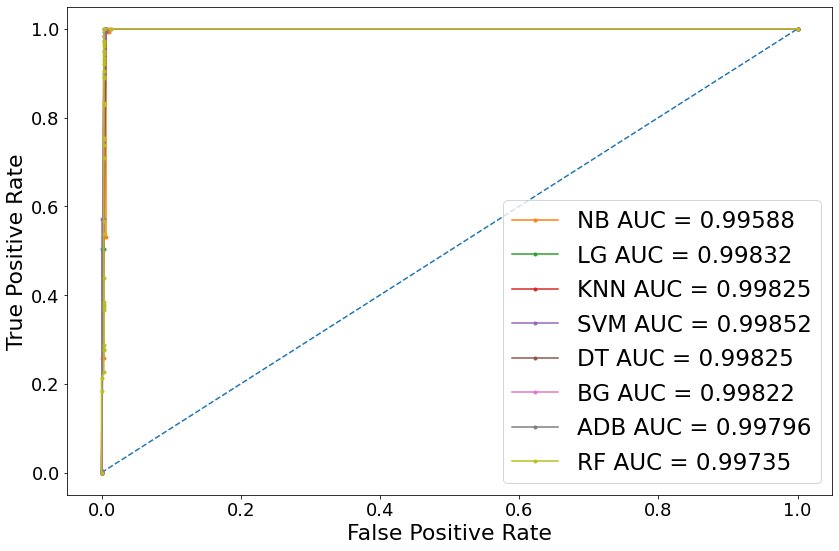

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(rndm_fpr, rndm_tpr, linestyle='--')
plt.plot(mnb_fpr, mnb_tpr, marker='.', label='NB AUC = %0.5f' % mnb_auc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='LG AUC = %0.5f' % lg_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN AUC = %0.5f' % knn_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM AUC = %0.5f' % svm_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT AUC = %0.5f' % knn_auc)
plt.plot(bg_fpr, bg_tpr, marker='.', label='BG AUC = %0.5f' % bg_auc)
plt.plot(adb_fpr, adb_tpr, marker='.', label='ADB AUC = %0.5f' % adb_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF AUC = %0.5f' % rf_auc)

# Title
#plt.title('ROC Plot', fontsize=22)
# Axis labels
plt.xlabel('False Positive Rate', fontsize=22)
plt.ylabel('True Positive Rate', fontsize=22)
# Show legend
plt.legend(fontsize=23)
# Save Fig
save_fig("suppobox_3_wo_gscv_roc")
# Show plot
plt.show()